# Итоговая работа: Анализ эффективности продаж в колл-центре

**1. Описание задачи**

**Предметная область:** Продажи банковских продуктов в процессе обслуживания клиентов в колл-центре.
**Источник данных:** Датасет с хакатона DANO, предоставленный в файле `Data.xlsx`.
**Цель исследования:** Определить ключевые факторы, влияющие на эффективность продаж (конверсию в заявку).
**Выбранная задача машинного обучения:** Бинарная классификация. Мы будем предсказывать, подаст ли клиент заявку на предложенный продукт (`application_flag` = 1) или нет (`application_flag` = 0).

**2. Используемые инструменты**

*   **Библиотеки:**
    *   `pandas` - для загрузки, обработки и анализа данных.
    *   `numpy` - для математических и матричных операций.
    *   `matplotlib.pyplot` и `seaborn` - для визуализации данных.
    *   `scikit-learn` - для построения и оценки моделей машинного обучения.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

sns.set_style('whitegrid')

In [3]:
# Задание 1: Загрузка данных в датафрейм

file_path = 'Data.xlsx'

try:
    df = pd.read_excel(file_path)
    print("Датасет успешно загружен.")
except FileNotFoundError:
    print(f"Ошибка: файл {file_path} не найден. Убедитесь, что он находится в той же папке, что и ноутбук, или укажите полный путь.")

print("Первые 5 строк датасета:")
df.head()

print("Общая информация о данных:")
df.info()

print("\nОписательная статистика:")
df.describe()

Датасет успешно загружен.
Первые 5 строк датасета:
Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   call_id                   150000 non-null  object 
 1   client_id                 150000 non-null  object 
 2   employee_id               150000 non-null  object 
 3   offer_type                150000 non-null  object 
 4   offer_time_sec            40107 non-null   float64
 5   voice_offer_flag          150000 non-null  int64  
 6   application_flag          150000 non-null  int64  
 7   utilization_flag          150000 non-null  int64  
 8   utilization_dt            1678 non-null    object 
 9   client_agree_flg          46132 non-null   float64
 10  wait_time_sec             150000 non-null  int64  
 11  appeal_time_sec           150000 non-null  int64  
 12  employee_dialog_time_s

,offer_time_sec,voice_offer_flag,application_flag,utilization_flag,client_agree_flg,wait_time_sec,appeal_time_sec,employee_dialog_time_sec,repeated_appeal_flg,negative_flg,csat_score,transfer_flg,task_flg,client_age,children_cnt,foreign_flg,suppress_call_flg,suppress_email_flg,suppress_limit_flg,suppress_sms_flg,work_experience_day_cnt
count,40107.000000,150000.000000,150000.000000,150000.000000,46132.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,13193.000000,150000.000000,150000.000000,149954.000000,91811.000000,150000.000000,145889.000000,145889.000000,2077.000000,3541.000000,150000.000000
mean,60.072684,0.270660,0.019627,0.011187,-0.610097,3.915120,403.525753,350.903687,0.389667,0.156693,4.491549,0.172767,0.080667,40.650766,0.189759,0.033660,0.018199,0.007725,0.854598,0.611692,631.915173
std,89.737008,0.444302,0.138714,0.105174,0.664014,24.920457,333.596045,339.701225,0.487676,0.363513,1.267429,0.378047,0.272323,13.366351,0.583866,0.180353,0.133670,0.087552,0.352591,0.487434,745.423753
min,0.032213,0.000000,0.000000,0.000000,-1.000000,0.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,28.200000,0.000000,0.000000,0.000000,-1.000000,0.000000,196.000000,142.000000,0.000000,0.000000,5.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,118.000000
50%,37.080000,0.000000,0.000000,0.000000,-1.000000,0.000000,314.000000,255.000000,0.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,367.000000
75%,57.375000,1.000000,0.000000,0.000000,0.000000,0.000000,503.000000,443.000000,1.000000,0.000000,5.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,798.000000
max,5353.710000,1.000000,1.000000,1.000000,1.000000,2072.000000,10912.000000,13457.000000,1.000000,1.000000,5.000000,1.000000,1.000000,125.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6750.000000


### Задание 2: Анализ и обработка пропущенных значений


In [4]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percent})

print("Анализ пропущенных значений:")
print(missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False))

Анализ пропущенных значений:
                     Missing Values  Percentage (%)
utilization_dt               148322       98.881333
suppress_limit_flg           147923       98.615333
suppress_sms_flg             146459       97.639333
csat_score                   136807       91.204667
offer_time_sec               109893       73.262000
client_agree_flg             103868       69.245333
client_education              82019       54.679333
сlient_city                   67698       45.132000
problem_status_code           65680       43.786667
marital_status_cd             62958       41.972000
children_cnt                  58189       38.792667
employee_city                 20919       13.946000
suppress_call_flg              4111        2.740667
suppress_email_flg             4111        2.740667
client_gender                  2110        1.406667
client_age                       46        0.030667


### Задание 2: Анализ и обработка пропущенных значений

**Анализ и принятие решений по отсутствующим данным:**

На основе вывода `df.isnull().sum()` мы видим, что многие столбцы имеют значительный процент пропусков. Наше решение по каждому случаю:

1.  **Столбцы с >70% пропусков (`utilization_dt`, `suppress_limit_flg`, `suppress_sms_flg`, `csat_score`, `offer_time_sec`):**
    *   **Причина пропусков:** Эти пропуски, как правило, не случайны. `utilization_dt` отсутствует, если не было утилизации; `offer_time_sec` — если не было озвучки оффера; `csat_score` — если клиент не поставил оценку.
    *   **Решение:**
        *   `utilization_dt`: Удалим этот столбец, так как он является следствием, а не причиной подачи заявки, и практически пуст.
        *   `suppress_limit_flg`, `suppress_sms_flg`: Заменим пропуски на `0`. Предполагаем, что пропуск означает отсутствие явного отказа от услуги, что функционально эквивалентно флагу `0`.
        *   `csat_score`: Заменим пропуски на `0`. Это позволит нам использовать `0` как отдельную категорию "оценка не поставлена", что может быть важным признаком.
        *   `offer_time_sec`: Заменим пропуски на `0`. Это логично, так как если оффер не был озвучен (`voice_offer_flag` = 0), то и времени на него затрачено не было.

2.  **Столбцы с 30-70% пропусков (`client_agree_flg`, `client_education`, `сlient_city`, `problem_status_code`, `marital_status_cd`, `children_cnt`):**
    *   **Решение:**
        *   **Категориальные (`client_education`, `сlient_city`, `problem_status_code`, `marital_status_cd`):** Заполнять модой (самым частым значением) некорректно при таком большом количестве пропусков, так как это сильно исказит распределение. Создадим для них отдельную категорию `'Unknown'`.
        *   **Числовые (`children_cnt`):** Заполним пропуски медианным значением. Медиана более устойчива к выбросам, чем среднее.
        *   **`client_agree_flg`**: Этот флаг согласия клиента имеет три состояния (-1, 1, 0). Заполним пропуски значением `0` (нет данных), что соответствует описанию.

3.  **Столбцы с <15% пропусков (`employee_city`, `suppress_call_flg`, `suppress_email_flg`, `client_gender`, `client_age`):**
    *   **Решение:** Здесь процент пропусков достаточно мал, чтобы заполнение не привело к сильным искажениям.
        *   **Категориальные (`employee_city`, `client_gender`):** Заполним модой.
        *   **Числовые (`client_age`):** Заполним медианой.
        *   **Флаги (`suppress_call_flg`, `suppress_email_flg`):** Заполним модой (скорее всего, `0`).

**Объяснение выбора:** Данная стратегия позволяет сохранить максимум данных, не внося при этом сильных искажений в их распределение. Введение категории `'Unknown'` для признаков с большим числом пропусков — стандартная практика, позволяющая модели машинного обучения самой определить, есть ли в факте отсутствия данных какая-либо закономерность.


In [5]:
# 1. Столбцы с >70% пропусков
df.drop('utilization_dt', axis=1, inplace=True)
df['suppress_limit_flg'] = df['suppress_limit_flg'].fillna(0)
df['suppress_sms_flg'] = df['suppress_sms_flg'].fillna(0)
df['csat_score'] = df['csat_score'].fillna(0)
df['offer_time_sec'] = df['offer_time_sec'].fillna(0)

# 2. Столбцы с 30-70% пропусков
df['client_agree_flg'] = df['client_agree_flg'].fillna(0)
df['children_cnt'] = df['children_cnt'].fillna(df['children_cnt'].median())

for col in ['client_education', 'сlient_city', 'problem_status_code', 'marital_status_cd']:
    df[col] = df[col].fillna('Unknown')

# 3. Столбцы с <15% пропусков
df['client_age'] = df['client_age'].fillna(df['client_age'].median())

for col in ['employee_city', 'client_gender', 'suppress_call_flg', 'suppress_email_flg']:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

# Проверяем, что пропусков не осталось
print("Количество пропусков после обработки:")
print(df.isnull().sum().sum())

Количество пропусков после обработки:
0


### Задание 3: Определение и преобразование типов признаков

Теперь, когда данные очищены, определим типы признаков и приведем их к корректному формату.

**Числовые признаки:**
*   `offer_time_sec`
*   `wait_time_sec`
*   `appeal_time_sec`
*   `employee_dialog_time_sec`
*   `client_age`
*   `children_cnt`
*   `work_experience_day_cnt`

**Категориальные признаки:**
*   Все остальные, включая все флаги (`_flg`), `offer_type`, `client_gender`, `csat_score` и т.д.

Необходимо преобразовать столбцы с плавающей точкой, которые по своей сути являются целочисленными (например, флаги или количество детей), в тип `int`.


In [6]:
# --- Преобразование типов данных ---

# Список столбцов, которые должны быть целочисленными
cols_to_int = [
    'offer_time_sec', 'client_agree_flg', 'csat_score',
    'client_age', 'children_cnt', 'suppress_call_flg',
    'suppress_email_flg', 'suppress_limit_flg', 'suppress_sms_flg'
]

for col in cols_to_int:
    df[col] = df[col].astype(int)

# Преобразуем call_dttm в формат datetime
df['call_dttm'] = pd.to_datetime(df['call_dttm'])

print("Типы данных после всех преобразований:")
df.info()

Типы данных после всех преобразований:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   call_id                   150000 non-null  object        
 1   client_id                 150000 non-null  object        
 2   employee_id               150000 non-null  object        
 3   offer_type                150000 non-null  object        
 4   offer_time_sec            150000 non-null  int64         
 5   voice_offer_flag          150000 non-null  int64         
 6   application_flag          150000 non-null  int64         
 7   utilization_flag          150000 non-null  int64         
 8   client_agree_flg          150000 non-null  int64         
 9   wait_time_sec             150000 non-null  int64         
 10  appeal_time_sec           150000 non-null  int64         
 11  employee_dialog_time_sec  

### Задание 4: Простая фильтрация данных

**Сформулируем 2 вопроса к данным, для ответа на которые требуется простая фильтрация:**

1.  **Вопрос 1:** "Вывести все коммуникации с клиентами из Москвы (`сlient_city` = 'MO'), где была подана заявка (`application_flag` = 1)".
2.  **Вопрос 2:** "Показать 5 звонков, где клиенту был предложен продукт 'Кредитная карта', но он выразил несогласие (`client_agree_flg` = -1)".


In [7]:
# Ответ на вопрос 1
print("Коммуникации с клиентами из Москвы, где была подана заявка:")
moscow_applications = df.loc[(df['сlient_city'] == 'MO') & (df['application_flag'] == 1)]
print(moscow_applications.head())


# Ответ на вопрос 2
print("\n5 звонков с предложением кредитной карты, где клиент был не согласен:")
credit_card_disagree = df.loc[(df['offer_type'] == 'Кредитная карта') & (df['client_agree_flg'] == -1)]
print(credit_card_disagree.head())

Коммуникации с клиентами из Москвы, где была подана заявка:
Empty DataFrame
Columns: [call_id, client_id, employee_id, offer_type, offer_time_sec, voice_offer_flag, application_flag, utilization_flag, client_agree_flg, wait_time_sec, appeal_time_sec, employee_dialog_time_sec, repeated_appeal_flg, negative_flg, call_dttm, csat_score, transfer_flg, task_flg, problem_status_code, client_age, client_gender, client_education, сlient_city, marital_status_cd, children_cnt, foreign_flg, suppress_call_flg, suppress_email_flg, suppress_limit_flg, suppress_sms_flg, work_experience_day_cnt, employee_type, employee_city, employee_gender, business_line]
Index: []

5 звонков с предложением кредитной карты, где клиент был не согласен:
                             call_id                         client_id  \
7   fde66d33d846b5822256123fec8d72ce  85e8d4f290e7db31f912f36a61e8b1c4   
10  fc0ec45f0741b20d9017e3abf0d4be1c  1761aed1ace00265a80c873b7317759b   
12  8217edcd99182158b811b24d3a1bd4b5  65bbbdb02ad

### Задание 5: Использование агрегирующих функций

**Сформулируем 2 вопроса к данным, для ответа на которые требуются агрегирующие функции:**

1.  **Вопрос 1:** "Каков средний возраст клиента (`client_age`) и средний стаж оператора (`work_experience_day_cnt`) для каждого типа предлагаемого продукта (`offer_type`)?"
2.  **Вопрос 2:** "Рассчитать общее количество поданных заявок (`application_flag`) и общее число негативных обращений (`negative_flg`) в разрезе полов клиента (`client_gender`)".


In [8]:
# Ответ на вопрос 1
print("Средний возраст клиента и стаж оператора по типам продуктов:")
avg_age_experience_by_offer = df.groupby('offer_type').agg(
    avg_client_age=('client_age', 'mean'),
    avg_employee_experience=('work_experience_day_cnt', 'mean')
).round(1)
print(avg_age_experience_by_offer)

# Ответ на вопрос 2
print("\nОбщее количество заявок и негативных обращений по полу клиента:")
sum_flags_by_gender = df.groupby('client_gender').agg(
    total_applications=('application_flag', 'sum'),
    total_negative_flags=('negative_flg', 'sum')
)
print(sum_flags_by_gender)

Средний возраст клиента и стаж оператора по типам продуктов:
                                avg_client_age  avg_employee_experience
offer_type                                                             
Дебетовая карта                           38.4                    611.0
Кредитная карта                           41.3                    635.0
Расчетно-кассовое обслуживание            44.0                    644.2
Рефинансирование                          44.9                    658.7
Страхование задолженности                 38.1                    643.0
Цифровой профиль                          42.1                    625.6

Общее количество заявок и негативных обращений по полу клиента:
               total_applications  total_negative_flags
client_gender                                          
F                            1330                 11716
M                            1614                 11788


### Задание 6: Поиск объектов с максимальным/минимальным значением

**Сформулируем 2 вопроса для поиска объектов с максимальными/минимальными значениями признаков:**

1.  **Вопрос 1:** "Вывести информацию о 5 звонках с самым долгим суммарным временем коммуникации (`appeal_time_sec`)".
2.  **Вопрос 2:** "Показать 5 операторов с наименьшим стажем работы (`work_experience_day_cnt`), исключив дубликаты, чтобы увидеть уникальных операторов".
ё

In [9]:
# Ответ на вопрос 1
print("Топ-5 самых долгих по времени коммуникаций:")
longest_appeals = df.nlargest(5, 'appeal_time_sec')
print(longest_appeals[['call_id', 'appeal_time_sec', 'offer_type', 'application_flag']])

# Ответ на вопрос 2
print("\nТоп-5 операторов с наименьшим стажем:")
# Сначала удаляем дубликаты по ID оператора, чтобы каждый был представлен один раз
unique_employees = df.drop_duplicates(subset='employee_id', keep='first')
least_experienced_employees = unique_employees.nsmallest(5, 'work_experience_day_cnt')
print(least_experienced_employees[['employee_id', 'work_experience_day_cnt', 'employee_city']])

Топ-5 самых долгих по времени коммуникаций:
                                 call_id  appeal_time_sec  \
102126  317f142dc8415eefad92e41fb86b7628            10912   
141609  071805511dc888dea26065576f2cd87b            10877   
25227   611c85b9b7f7081130399950f7aeaec1             7194   
100798  de737c955370d5e73ddd9e91b9973654             7193   
143401  eea54b028b7d3ba2046d25f42f8345e5             5516   

                       offer_type  application_flag  
102126            Кредитная карта                 0  
141609            Дебетовая карта                 0  
25227             Дебетовая карта                 0  
100798            Дебетовая карта                 0  
143401  Страхование задолженности                 0  

Топ-5 операторов с наименьшим стажем:
                            employee_id  work_experience_day_cnt  \
3223   874e3e15698f8e9e7deec66b7ecf889b                        3   
4173   ca746da70220facb8cf65c24cdc5a380                        3   
7692   3bf9ccb64e20ecf

### Задание 7: Столбчатая диаграмма для категориального признака

Выберем категориальный признак с небольшим количеством значений — `employee_type` (Тип трудоустройства). Построим столбчатую диаграмму, которая покажет количество коммуникаций, обработанных каждым типом сотрудников.

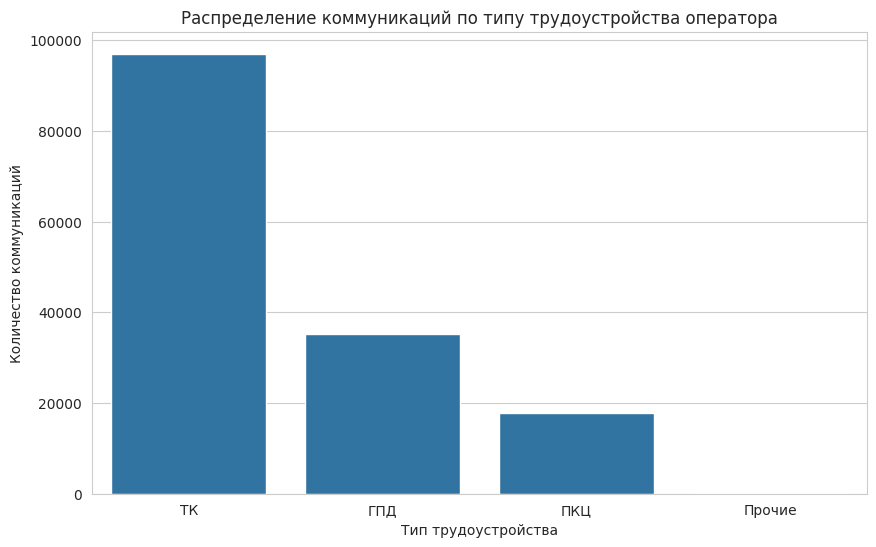

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='employee_type', data=df, order=df['employee_type'].value_counts().index)
plt.title('Распределение коммуникаций по типу трудоустройства оператора')
plt.xlabel('Тип трудоустройства')
plt.ylabel('Количество коммуникаций')
plt.show()

### Задание 8: Круговая диаграмма для другого категориального признака

Для круговой диаграммы выберем бинарный признак `transfer_flg` (Флаг наличия трансфера на коммуникации), чтобы наглядно показать долю звонков, которые были переведены на другого специалиста.

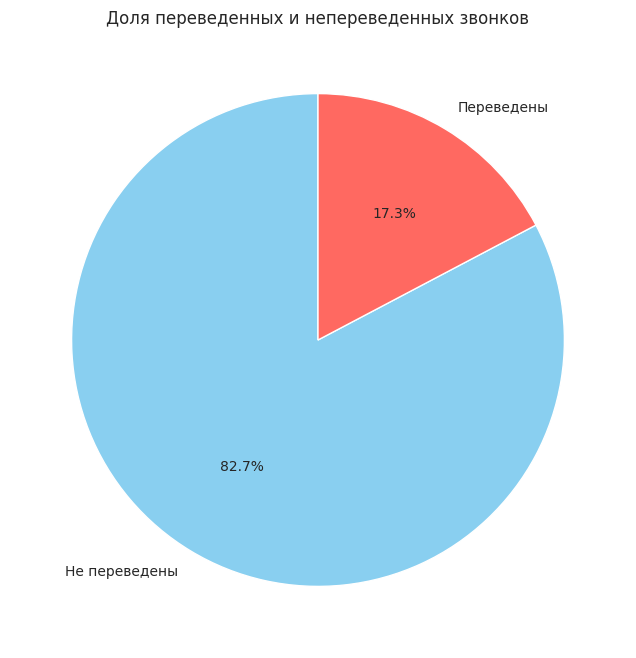

In [11]:
transfer_counts = df['transfer_flg'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    transfer_counts,
    labels=['Не переведены', 'Переведены'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#89CFF0', '#FF6961']
)
plt.title('Доля переведенных и непереведенных звонков')
plt.ylabel('')
plt.show()

### Задание 9: Группировка данных и вывод агрегированной информации

Сгруппируем данные по одному из категориальных признаков — `business_line` (Бизнес-линия) и выведем агрегированную информацию по двум числовым признакам:
1.  Среднее время ожидания клиента на линии (`wait_time_sec`).
2.  Максимальное время диалога сотрудника с клиентом (`employee_dialog_time_sec`).

In [12]:
print("Агрегированная информация по бизнес-линиям:")

business_line_agg = df.groupby('business_line').agg(
    avg_wait_time=('wait_time_sec', 'mean'),
    max_dialog_time=('employee_dialog_time_sec', 'max')
).round(1)

print(business_line_agg)

Агрегированная информация по бизнес-линиям:
                        avg_wait_time  max_dialog_time
business_line                                         
Mobile                            3.3             3396
Premium Банк                      4.6             3614
SME                               4.0             2935
Депозитные продукты               4.4             7110
Инвестиции                        3.1             4723
Кредитные продукты                2.9             7214
Нефинансовые продукты             4.4             3237
Экосистемные обращения            2.9            13457
нет данных                        3.1             4651


### Задание 10: Формулирование и добавление нового признака

На основе имеющихся признаков сформулируем новый бинарный признак, который может быть полезен для модели.

**Идея:** Разделить операторов на "опытных" и "новичков" на основе их стажа. Это может помочь модели выявить, влияет ли опыт оператора на успешность продажи.

**Новый признак:** `is_experienced_employee`.
*   Признак будет равен `1`, если стаж оператора (`work_experience_day_cnt`) больше медианного значения по всему датасету.
*   Признак будет равен `0` в противном случае.

Добавим этот признак в наш датафрейм.


In [13]:
median_experience = df['work_experience_day_cnt'].median()
print(f"Медианный стаж оператора: {median_experience:.0f} дней.")

df['is_experienced_employee'] = (df['work_experience_day_cnt'] > median_experience).astype(int)

print("\nПример нового признака:")
print(df[['work_experience_day_cnt', 'is_experienced_employee']].head())

print("\nРаспределение по новому признаку:")
print(df['is_experienced_employee'].value_counts())

Медианный стаж оператора: 367 дней.

Пример нового признака:
   work_experience_day_cnt  is_experienced_employee
0                      176                        0
1                     1754                        1
2                      301                        0
3                      622                        1
4                       94                        0

Распределение по новому признаку:
is_experienced_employee
0    75042
1    74958
Name: count, dtype: int64


### Задание 11: Исследование связи между числовыми признаками

Выберем 3 числовых признака и попарно исследуем их на наличие связи с помощью точечных диаграмм (диаграмм рассеяния).

**Выбранные признаки:**
1.  `client_age` (Возраст клиента)
2.  `work_experience_day_cnt` (Стаж оператора в днях)
3.  `employee_dialog_time_sec` (Время диалога с сотрудником)

Построим матрицу диаграмм рассеяния. Так как в датасете 150 000 записей, для наглядности визуализации построим ее на случайной выборке из 5000 записей, чтобы точки не сливались в сплошное пятно.

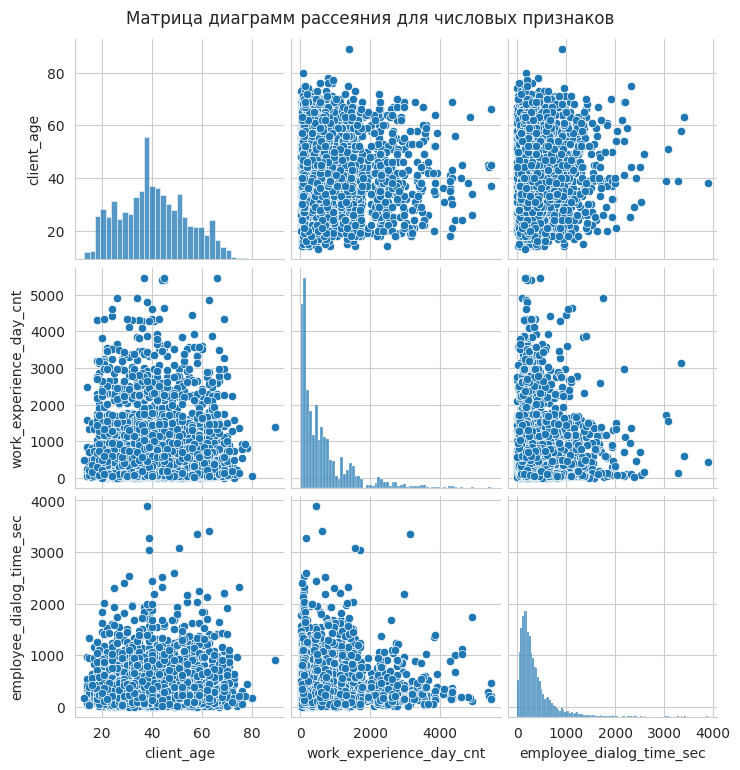

In [14]:
df_sample = df.sample(n=5000, random_state=42)

features_to_plot = ['client_age', 'work_experience_day_cnt', 'employee_dialog_time_sec']

sns.pairplot(df_sample[features_to_plot])
plt.suptitle('Матрица диаграмм рассеяния для числовых признаков', y=1.02)
plt.show()

### Задание 12: Построение Boxplot и обработка выбросов

Выберем 3 числовых признака и построим для каждого из них диаграмму "ящик с усами" (boxplot) для анализа распределения и выявления выбросов.

**Выбранные признаки:**
1.  `appeal_time_sec` (Суммарное время коммуникации)
2.  `wait_time_sec` (Время ожидания клиента)
3.  `work_experience_day_cnt` (Стаж оператора)

Затем выберем признак с наиболее явно выраженными выбросами и напишем код для их замены на максимальное значение, не считающееся выбросом (граница "уса").

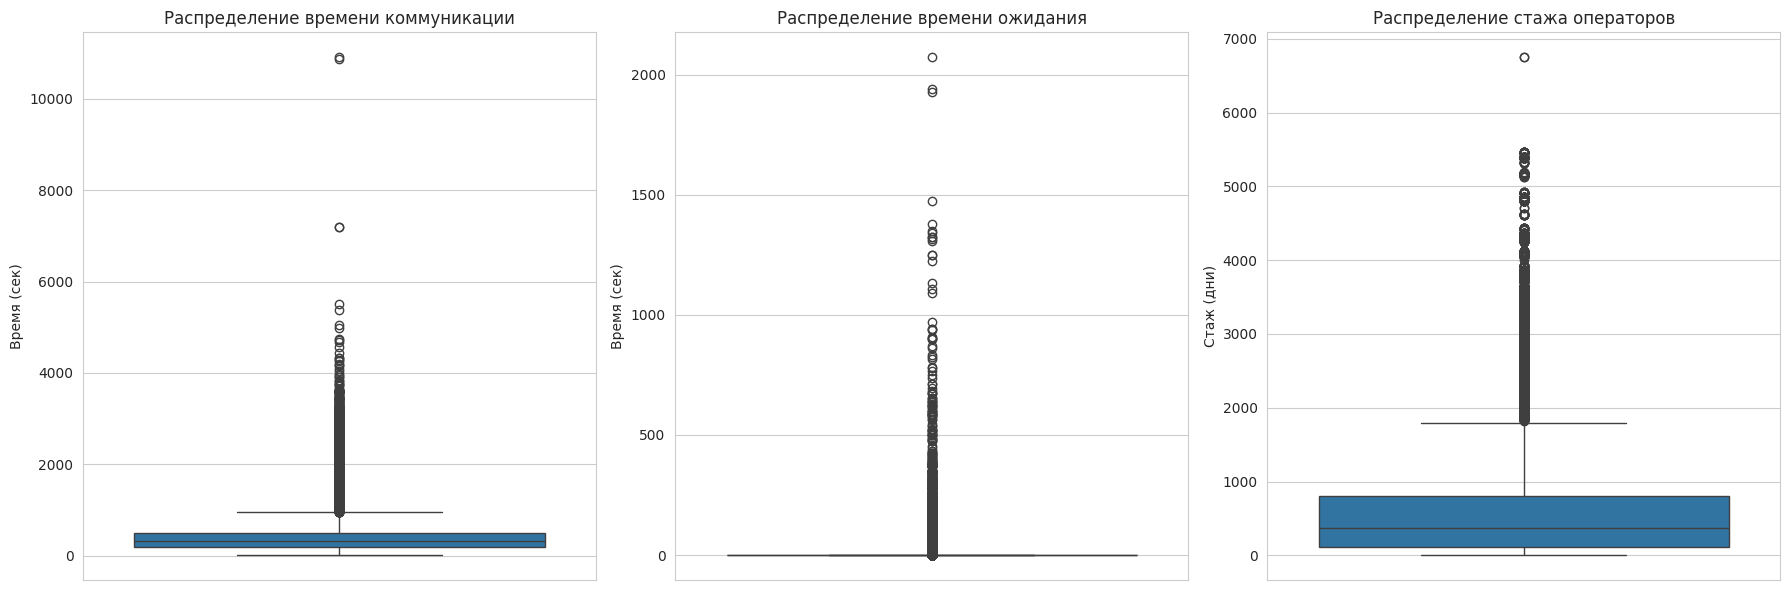

In [15]:
plt.figure(figsize=(18, 6))

# График 1
plt.subplot(1, 3, 1)
sns.boxplot(y=df['appeal_time_sec'])
plt.title('Распределение времени коммуникации')
plt.ylabel('Время (сек)')

# График 2
plt.subplot(1, 3, 2)
sns.boxplot(y=df['wait_time_sec'])
plt.title('Распределение времени ожидания')
plt.ylabel('Время (сек)')


# График 3
plt.subplot(1, 3, 3)
sns.boxplot(y=df['work_experience_day_cnt'])
plt.title('Распределение стажа операторов')
plt.ylabel('Стаж (дни)')

plt.tight_layout()
plt.show()

Обработка выбросов для признака: appeal_time_sec
Q1 = 196.0, Q3 = 503.0, IQR = 307.0
Верхняя граница для выбросов: 963.5
Количество выбросов до обработки: 8485
Количество выбросов после обработки: 0


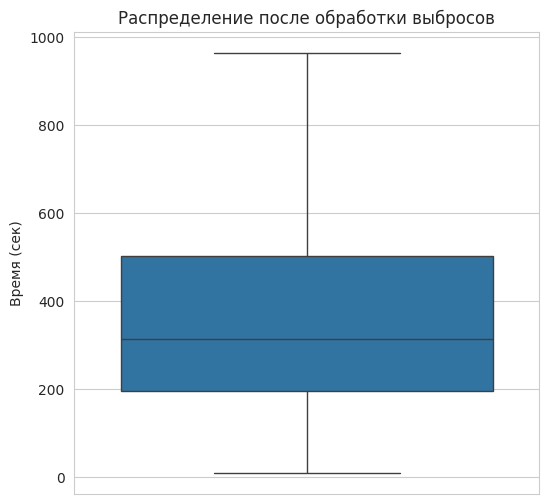

In [16]:
feature_to_process = 'appeal_time_sec'
print(f"Обработка выбросов для признака: {feature_to_process}")

# 1-2. Рассчитываем Q1, Q3 и IQR
Q1 = df[feature_to_process].quantile(0.25)
Q3 = df[feature_to_process].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")

# 3. Определяем верхнюю границу
upper_bound = Q3 + 1.5 * IQR
print(f"Верхняя граница для выбросов: {upper_bound}")

# Находим количество выбросов
outliers_count_before = df[df[feature_to_process] > upper_bound].shape[0]
print(f"Количество выбросов до обработки: {outliers_count_before}")

# 4. Заменяем выбросы
df[feature_to_process] = np.where(
    df[feature_to_process] > upper_bound,
    upper_bound,
    df[feature_to_process]
)

outliers_count_after = df[df[feature_to_process] > upper_bound].shape[0]
print(f"Количество выбросов после обработки: {outliers_count_after}")


# Построим boxplot еще раз, чтобы убедиться в результате
plt.figure(figsize=(6, 6))
sns.boxplot(y=df[feature_to_process])
plt.title('Распределение после обработки выбросов')
plt.ylabel('Время (сек)')
plt.show()

### Задание 13: Выбор задачи для решения на датасете

**Решение:**
Как и было определено в самом начале, мы решаем **задачу бинарной классификации**.
**Цель:** предсказать, подаст ли клиент заявку на предложенный продукт.
**Целевая переменная:** `application_flag`, где `1` — заявка подана, `0` — заявка не подана.

### Задание 14: Формирование списка факторных и целевого признаков

Необходимо разделить наш датафрейм на два:
1.  `X` — матрица с факторными признаками (всеми, которые могут влиять на результат).
2.  `y` — вектор с целевым признаком (то, что мы хотим предсказать).

Из списка факторных признаков нужно исключить:
*   Сам целевой признак: `application_flag`.
*   Признаки, которые являются следствием, а не причиной (например, `utilization_flag`).
*   Уникальные идентификаторы: `call_id`, `client_id`, `employee_id`.
*   Даты в исходном формате: `call_dttm`.

In [17]:
y = df['application_flag']

columns_to_drop = [
    'application_flag',
    'utilization_flag',
    'call_id',
    'client_id',
    'employee_id',
    'call_dttm'
]
X = df.drop(columns=columns_to_drop)

print("Размерность матрицы признаков X:", X.shape)
print("Размерность вектора y:", y.shape)

print("\nПервые 5 строк матрицы X:")
print(X.head())

Размерность матрицы признаков X: (150000, 30)
Размерность вектора y: (150000,)

Первые 5 строк матрицы X:
        offer_type  offer_time_sec  voice_offer_flag  client_agree_flg  \
0  Кредитная карта               0                 0                 0   
1  Кредитная карта               0                 0                 0   
2  Кредитная карта               0                 0                 0   
3  Кредитная карта               0                 0                 0   
4  Дебетовая карта               0                 0                 0   

   wait_time_sec  appeal_time_sec  employee_dialog_time_sec  \
0              0            379.0                       261   
1              0            141.0                        93   
2              0            142.0                       114   
3              0            963.5                      1741   
4              0            261.0                       211   

   repeated_appeal_flg  negative_flg  csat_score  transfer_flg  task_f

### Задание 15: Кодирование категориальных признаков

Модели машинного обучения работают с числами, поэтому все категориальные признаки (например, 'Кредитная карта', 'Москва', 'М') необходимо преобразовать в числовой формат. Мы используем для этого метод One-Hot Encoding (`pd.get_dummies`), который создает новые бинарные столбцы для каждой категории.

In [18]:
categorical_cols = X.select_dtypes(include=['object']).columns
print(f"Категориальные столбцы для кодирования: {list(categorical_cols)}")

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("\nРазмерность матрицы X после кодирования:", X_encoded.shape)
print("Пример закодированных данных:")
print(X_encoded.head())

Выходные данные были обрезаны до нескольких последних строк (5000).
3                  False                 False                   False   
4                  False                 False                   False   

   сlient_city_МАГАДАН Г  сlient_city_МАЙКОП Г  сlient_city_МАЛГОБЕК Г  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   сlient_city_МАССИВ 45 КМ АВТОДОРОГИ САНКТ-ПЕТЕРБУРГ-ПСКОВ  \
0                                              False           
1                                              False           
2                                              False           
3                                              False           
4                 

### Задание 16: Нормализация факторных признаков

Некоторые модели (например, логистическая регрессия) чувствительны к масштабу данных. Признаки с большими значениями (как `work_experience_day_cnt`) могут оказывать непропорционально большое влияние на результат. Чтобы этого избежать, приведем все признаки к одному масштабу с помощью стандартизации (нормализации).

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_encoded)
X_scaled = pd.DataFrame(X_scaled, columns=X_encoded.columns)

print("Данные успешно нормализованы.")
print("Пример нормализованных данных (среднее близко к 0, ст.отклонение к 1):")
print(X_scaled.describe())

Выходные данные были обрезаны до нескольких последних строк (5000).

       employee_city_г Балтийск  employee_city_г Барабинск  \
count              1.500000e+05               1.500000e+05   
mean               1.373716e-18               1.226870e-17   
std                1.000003e+00               1.000003e+00   
min               -6.831460e-03              -2.098079e-02   
25%               -6.831460e-03              -2.098079e-02   
50%               -6.831460e-03              -2.098079e-02   
75%               -6.831460e-03              -2.098079e-02   
max                1.463816e+02               4.766264e+01   

       employee_city_г Барнаул  employee_city_г Батайск  \
count             1.500000e+05             1.500000e+05   
mean              4.985642e-17             1.818989e-17   
std               1.000003e+00             1.000003e+00   
min              -9.972255e-02            -3.570654e-02   
25%              -9.972255e-02            -3.570654e-02   
50%              -

### Задание 17: Разбиение на обучающую и тестовую выборки

Чтобы объективно оценить качество нашей будущей модели, мы должны обучить ее на одной части данных (обучающая выборка), а проверить — на другой, которую модель еще "не видела" (тестовая выборка). Стандартным соотношением является 80% на обучение и 20% на тест.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Данные разделены на обучающую и тестовую выборки:")
print(f"Размер X_train: {X_train.shape}")
print(f"Размер X_test: {X_test.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Размер y_test: {y_test.shape}")

Данные разделены на обучающую и тестовую выборки:
Размер X_train: (120000, 3127)
Размер X_test: (30000, 3127)
Размер y_train: (120000,)
Размер y_test: (30000,)


### Задание 18: Выбор и обучение 2 моделей для решения поставленной задачи

Мы выбрали две популярные модели для задачи классификации:

1.  **`LogisticRegression`**: Простая, быстрая и хорошо интерпретируемая модель. Она послужит нам хорошей "отправной точкой" (baseline), чтобы было с чем сравнивать более сложные модели.
2.  **`RandomForestClassifier`**: Мощный ансамблевый метод, основанный на построении множества деревьев решений. Обычно показывает высокое качество "из коробки" и устойчив к переобучению.

Сейчас мы обучим обе модели на наших подготовленных обучающих данных (`X_train`, `y_train`) и сделаем предсказания на тестовых данных (`X_test`).

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

sample_size = 50000
X_train_sample = X_train.sample(n=sample_size, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

print(f"Обучение будет проводиться на выборке размером {sample_size} строк.")

print("\n--- Обучение Логистической регрессии ---")
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_sample, y_train_sample)
y_pred_lr = log_reg.predict(X_test)
y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]
print("Модель обучена и предсказания получены.")

print("\n--- Обучение Случайного леса ---")
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train_sample, y_train_sample)
y_pred_rf = random_forest.predict(X_test)
y_pred_proba_rf = random_forest.predict_proba(X_test)[:, 1]
print("Модель обучена и предсказания получены.")

Обучение будет проводиться на выборке размером 50000 строк.

--- Обучение Логистической регрессии ---
Модель обучена и предсказания получены.

--- Обучение Случайного леса ---
Модель обучена и предсказания получены.


### Задание 19: Расчет метрик (показателей качества)

Теперь оценим, насколько хорошо наши модели справились с задачей. Так как у нас задача с несбалансированными классами (заявок намного меньше, чем отказов), `accuracy` (общая точность) не является показательной метрикой. Мы будем ориентироваться на:

*   **Precision**: Точность. Доля объектов, названных классификатором положительными и при этом действительно являющихся положительными.
*   **Recall**: Полнота. Доля объектов положительного класса из всех объектов положительного класса, которую нашел алгоритм.
*   **F1-score**: Среднее гармоническое между точностью и полнотой.
*   **ROC AUC**: Площадь под ROC-кривой. Отличная агрегированная метрика качества для бинарной классификации.

In [22]:
print("--- Метрики для Логистической регрессии ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_lr))
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred_lr))


print("\n--- Метрики для Случайного леса ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred_rf))

--- Метрики для Логистической регрессии ---
Accuracy: 0.9903333333333333
ROC AUC Score: 0.9938641970056247

Отчет по классификации:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     29411
           1       0.73      0.81      0.77       589

    accuracy                           0.99     30000
   macro avg       0.86      0.90      0.88     30000
weighted avg       0.99      0.99      0.99     30000


--- Метрики для Случайного леса ---
Accuracy: 0.9887333333333334
ROC AUC Score: 0.9966183552011743

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29411
           1       0.96      0.44      0.61       589

    accuracy                           0.99     30000
   macro avg       0.97      0.72      0.80     30000
weighted avg       0.99      0.99      0.99     30000



### Задание 20: Подбор гиперпараметра и анализ его влияния на качество

Для модели **Случайный лес** выберем один важный гиперпараметр и посмотрим, как его изменение влияет на качество модели.

**Выбранный гиперпараметр:** `n_estimators` (количество "деревьев" в лесу).
**План:**
1.  Обучим модель несколько раз с разным количеством деревьев (например, от 10 до 200).
2.  Для каждого случая замерим метрику `ROC AUC` на тестовой выборке.
3.  Построим график зависимости `ROC AUC` от `n_estimators`.

Начинаем подбор гиперпараметра n_estimators на подвыборке...
n_estimators = 10, ROC AUC = 0.9888
n_estimators = 50, ROC AUC = 0.9956
n_estimators = 100, ROC AUC = 0.9966
n_estimators = 150, ROC AUC = 0.9977
n_estimators = 200, ROC AUC = 0.9977


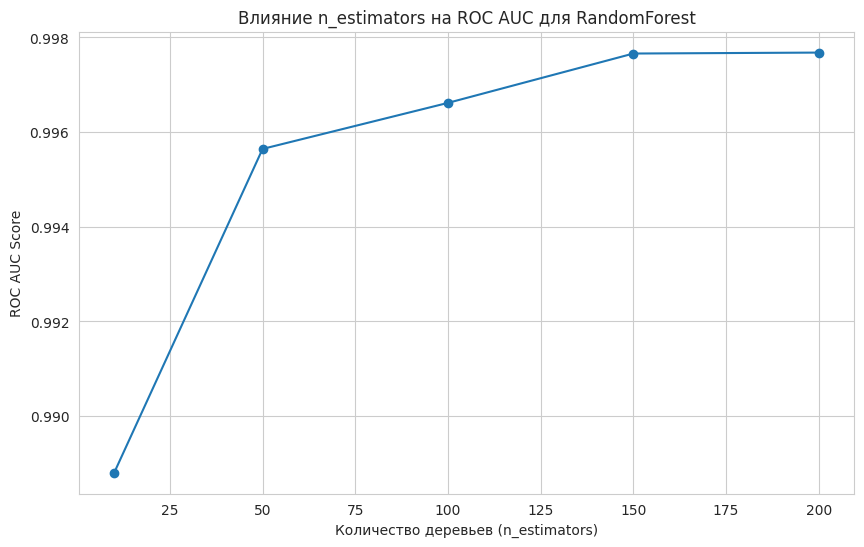

In [23]:
# Задание 20

estimator_range = [10, 50, 100, 150, 200]
roc_auc_scores = []
print("Начинаем подбор гиперпараметра n_estimators на подвыборке...")

for n in estimator_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)

    model.fit(X_train_sample, y_train_sample)

    y_pred_proba = model.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, y_pred_proba)
    roc_auc_scores.append(score)
    print(f"n_estimators = {n}, ROC AUC = {score:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(estimator_range, roc_auc_scores, marker='o', linestyle='-')
plt.title('Влияние n_estimators на ROC AUC для RandomForest')
plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('ROC AUC Score')
plt.grid(True)
plt.show()